**Grupo 4: Griselda Itovich, Agustin Helou, Maria Eva Ortega**

<a id='Volver_indice'></a>

**Indice del Trabajo Integrador Final como clasificador binario de riesgo de hipertensión:**

[Sección 0](#section0):  Introducción y resumen del trabajo
<a href='#section0'></a> 

[Sección 1](#section1):  Importación de librerías
<a href='#section1'></a> 

[Sección 2](#section2):  Análisis descriptivo del dataset y eliminación de outliers. Determinación de dataset filtrado para determinación de riesgo de hipertensión
<a href='#section2'></a> 

[Sección 3](#section3): Bagging de modelos: Random Forest. Importancia de features: Feature Importance, SelectKbest. RFECV <br/>


1.   Modelo_1: Random Forest con GridSearchCV.
2.   Modelo_2: Random Forest best (Comprobacion vs Modelo_1).
3.   Feature importance con Random Forest best.
4.   Modelo_3: Random Forest con reducción de features, según Paso 3.
5.   Feature importance con SelectKbest.
6.   Feature importance con RFECV.
7.   Modelo_4: Random Forest con reducción de features, según Paso 6.
8.   Evaluación de métricas de los modelos: accuracy, precision, f1_score, recall, confusion matrix, AUC, roc_curve.
<a href='#section3'></a> 

[Sección 4](#section4):  Boosting
<a href='#section4'></a> 
1. Modelo_5: AdaBoosting con GridSearchCV
2. Modelo_6: GradientBoosting con GridSearchCV
3. Modelo_7: ExtremeGradientBoosting con GridSearchCV
4. Modelo_8: LightGradientBoosting con GridSearchCV
5. Evaluacion de métricas de modelos (como en la Sección 3)

[Sección 5](#section5): Pipelines
<a href='#section5'></a> 
1. Modelo_9: Pipeline básico con escalado y RandomForest
2. Modelo_10: Pipeline con escalado y RandomForest, con GridSearchCV
3. Modelo_11: Pipeline con dos escaladores y RandomForest, con GridSearchCV
4. Modelo_12: Pipeline con seleccion de features, escalado y RandomForest con GridSearchCV
5. Modelo_13: Pipeline básico con una columna auxiliar, escalado, Regresion Logística
6. Modelo_14: Pipeline Modelo_13 con GridSearchCV
7. Evaluación de métricas de modelos (como en la Sección 3)


[Sección 6](#section6): Deploy de modelos
<a href='#section6'></a> 

[Sección 7](#section7): Conclusiones
<a href='#section7'></a> 

<a id='section0'></a>
### Sección 0


<div class="alert alert- block alert-info">
 Para abordar la clasificación binaria de riesgo de pacientes, como hipertensos o no hipertensos se eligieron columnas del dataset vinculadas con dicha patología. Las variables elegidas se seleccionaron teniendo en cuenta el artículo [1], donde se puede encontrar una amplia reseña de trabajos de determinación de pacientes con y sin hipertensión empleando métodos de Machine Learning, ya sea por medio de regresión lineal o bien clasificación. También se han consultado publicaciones del tema como [2], que predicen empleando métodos del machine learning profundo (deep learning) como redes neuronales. La base de datos con la que se trabajo fue provista por el Ministerio de Salud de la Pcia. de Neuquén y cuenta con alrededor de 60000 registros de pacientes, asistentes a consultas en hospitales públicos de distintas localizaciones, durante los años 2019, 2020 y 2021.  
       </div>

<div class="alert alert- block alert-info">
   Referencias:<br />
[1] Martinez Ríos, E., Montesinos L., Alfaro-Ponce, M., Pecchia, L. A review of machine learning in hypertension detection and blood pressure estimation based on clinical and physiological data, Biomedical Signal Processing and Control 68 (2021) 102813.<br />
[2] LaFreniere, D., Zulkernine, F., Barber, D., Martin, K. Using Machine Learning to Predict Hypertension from a Clinical Dataset, IEEE Symposium on Computational Intelligence (SSCI) (2016).</div>

<div class="alert alert- block alert-info">
   En primer lugar se comienza por analizar el dataset, efectuar una limpieza y eliminación de outliers. Posteriormente, se efectúan diferentes pruebas probando con diferentes modelos de clasificacion y para determinar los aspectos (features) más importantes a considerar para la determinacion que se busca, con distintas metodologías. Para esta tarea se elige como estimador RandomForestClassifier, en combinación con el método feature_importance y la librería RFECV, por destacar algunos procedimientos, para construir otros modelos partiendo del analisis de features. Tambien se aplican pruebas de selección de features, univariados como SelectKbest. Posteriormente, se aplican métodos de boosting, como AdaBoosting, GradientBoosting, ExtremeGradientBoosting y LightGradientBoosting, siempre en combinación con GridSearchCV, para la determinacion de riesgo de hipertensión. En todos los casos, se evalúan las métricas de los modelos. Por último en cuanto al análisis de modelos, se efectuan implementaciones con pipelines, mejorando algunos de los ya analizados y proponiendo algunos nuevos. Como punto final del análisis efectuado, se realiza el deploy de uno de los mejores modelos hallados, segun métricas, usando Pickle. Por último, se dan algunas conclusiones.
       </div>
       

[Volver al índice](#Volver_indice)
<a href='#Volver_indice'></a> 

<a id='section1'></a>
### Sección 1

***Importación de librerías***

In [1]:
#importación de librerías básicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime

# importación de librerias para análisis de modelos y métricas

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc

from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import pickle
import os


[Volver al índice](#Volver_indice)
<a href='#Volver_indice'></a> 

<a id='section2'></a>
### Sección 2


***Análisis descriptivo del dataset***

In [2]:
#%%time
data_cruda = pd.read_csv('para_ejercitacion_con_RCVG_1.csv', sep =';', encoding = 'utf_8')

data  = data_cruda

# Elimino posibles duplicados
data = data.drop_duplicates()

# Adecuacion fechas auxiliar
now = datetime.datetime.now()

# Adecuacion de columnas y cambios de nombres en columnas
data['EDAD'] = (now - pd.to_datetime(data['FECHA DE NACIMIENTO'])).astype('<m8[Y]') 
data.rename(columns = {'ENF. CARDIOVASCULAR ESTABLECIDA':'ENF.CARDIOVASCULAR_ESTABLECIDA'},inplace = True)

data['LOCALIDAD']=data['LOCALIDAD'].str.upper()
data.LOCALIDAD[data.LOCALIDAD=='NEUQUÉN']='NEUQUEN'


# df va a ser el dataset que se va a utilizar para deterinar riesgo hipertension con seleccion de columnas
df = data[['TAS','TAD','SEXO', 'DIABETES', 'DISLIPEMIA', 'OBESIDAD','UTMO_IMC', 'CLASIFICACION_IMC', 'CLEARANCE','COLESTEROL_TOTAL','EDAD','ENF.CARDIOVASCULAR_ESTABLECIDA','HIPERTENSION']]

# se eliminan registros con nans
df = df.dropna()

# se transforman en dummies columnas categóricas seleccionadas para la predicción 
df = pd.get_dummies(df, prefix = ['SEXO', 'DIABETES', 'DISLIPEMIA', 'OBESIDAD', 'CLASIFICACION_IMC','ENF.CARDIOVASCULAR_ESTABLECIDA','HIPERTENSION'], columns=['SEXO', 'DIABETES', 'DISLIPEMIA', 'OBESIDAD','CLASIFICACION_IMC','ENF.CARDIOVASCULAR_ESTABLECIDA','HIPERTENSION'],drop_first = True)

#información general resumen
print('Columnas iniciales que se consideran para predecir hipertensión:\n', df.columns)
print('\nDimensiones del dataset filtrado inicial para analizar:',  df.shape)

print('\nPorcentaje de no hipertensos:', round(df.HIPERTENSION_SI.value_counts(normalize=True)[0],3))
print('\nPorcentaje de hipertensos:', round(df.HIPERTENSION_SI.value_counts(normalize=True)[1],3))



Columnas iniciales que se consideran para predecir hipertensión:
 Index(['TAS', 'TAD', 'UTMO_IMC', 'CLEARANCE', 'COLESTEROL_TOTAL', 'EDAD',
       'SEXO_MASCULINO', 'DIABETES_DM2', 'DIABETES_NO', 'DISLIPEMIA_SI',
       'OBESIDAD_SI', 'CLASIFICACION_IMC_NORMAL', 'CLASIFICACION_IMC_OBESIDAD',
       'CLASIFICACION_IMC_SOBREPESO', 'ENF.CARDIOVASCULAR_ESTABLECIDA_SI',
       'HIPERTENSION_SI'],
      dtype='object')

Dimensiones del dataset filtrado inicial para analizar: (11995, 16)

Porcentaje de no hipertensos: 0.632

Porcentaje de hipertensos: 0.368


Cantidad de registros de pacientes según localidad neuquina


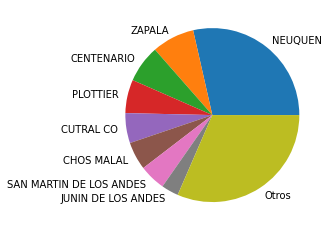

(59965, 51)

<Figure size 432x288 with 0 Axes>

In [3]:
serie_aux = data.LOCALIDAD.value_counts()
valores = serie_aux[:8].values.tolist()
valores.append(serie_aux[8:].sum())
valores

labels = serie_aux[:8].index.tolist()
labels.append('Otros')
labels

print ('Cantidad de registros de pacientes según localidad neuquina')
plt.pie(valores,labels = labels)
plt.show()
plt.savefig('torta_ciudades.PNG')
plt.savefig("torta_ciudades.pdf")
serie_aux[:10].sum()
data.shape

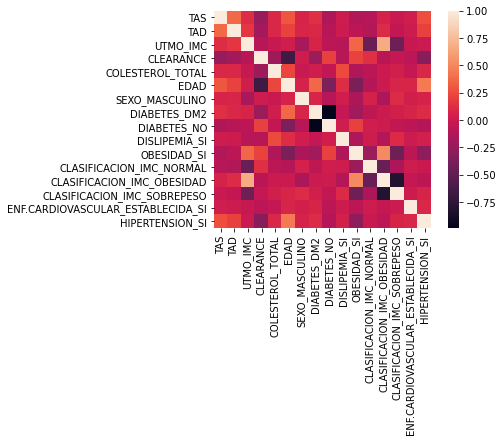

In [4]:
#matriz de correlación general de df
sns.heatmap(df.corr(),square = True);

Text(0.5, 1.0, 'Correlación entre aspectos predictores seleccionados e Hipertensión')

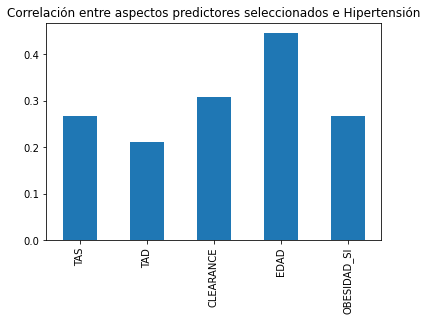

In [5]:
# correlación de las columnas de train de df con la de test (target = HIPERTENSION_SI)
correlacion_target = abs(df.corr()['HIPERTENSION_SI'])
#print(type(correlacion_target))
mask=(correlacion_target > 0.15) & (correlacion_target < 1)
correlacion_target = correlacion_target[mask]
correlacion_target.plot.bar()
plt.title("Correlación entre aspectos predictores seleccionados e Hipertensión",loc ='center')

In [6]:
df.describe()
# se observan outliers

,TAS,TAD,UTMO_IMC,CLEARANCE,COLESTEROL_TOTAL,EDAD,SEXO_MASCULINO,DIABETES_DM2,DIABETES_NO,DISLIPEMIA_SI,OBESIDAD_SI,CLASIFICACION_IMC_NORMAL,CLASIFICACION_IMC_OBESIDAD,CLASIFICACION_IMC_SOBREPESO,ENF.CARDIOVASCULAR_ESTABLECIDA_SI,HIPERTENSION_SI
count,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000
mean,125.016924,77.296207,33.876969,97.810954,183.751582,48.943560,0.312547,0.315882,0.678116,0.120550,0.739808,0.070279,0.729554,0.194164,0.024010,0.368404
std,29.247829,18.169841,6.931371,31.151028,43.530877,18.590106,0.463551,0.464885,0.467218,0.325617,0.438757,0.255628,0.444209,0.395572,0.153087,0.482392
min,11.000000,7.000000,4.030000,0.160000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,70.000000,29.590000,78.270000,154.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,80.000000,33.080000,95.990000,180.000000,51.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,140.000000,83.000000,37.640000,113.545000,210.000000,63.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1580.000000,802.000000,78.490000,299.960000,593.000000,101.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#sns.pairplot(df[['CLEARANCE','COLESTEROL_TOTAL','UTMO_IMC','TAS','TAD']])

<div class="alert alert- block alert-success">
    <b>Restriccion de la edad de la poblacion del dataset filtrado inicial para evaluar riesgo de hipertensión<b/b>
        </div>

<AxesSubplot:xlabel='EDAD', ylabel='COLESTEROL_TOTAL'>

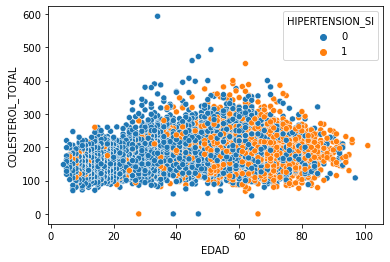

In [8]:
sns.scatterplot(data = df,x ='EDAD',y ='COLESTEROL_TOTAL',hue ='HIPERTENSION_SI')

In [9]:
# restriccion general en cuando a la edad del grupo etario a considerar en df
indexNames1 = df[df.EDAD < 40].index
df.drop(indexNames1, inplace = True)

print ('Cantidad de registros de df filtrado por edad:', df.shape[0])
print('No Hipertensos:', round(df.HIPERTENSION_SI.value_counts(normalize=True)[0],3))
print('Hipertensos:', round(df.HIPERTENSION_SI.value_counts(normalize=True)[1],3))

Cantidad de registros de df filtrado por edad: 8405
No Hipertensos: 0.513
Hipertensos: 0.487


<font color='magenta'>*Las clases estan balanceadas*</font>

<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Correlación entre aspectos predictores e Hipertensión en dataset con restriccion edad')

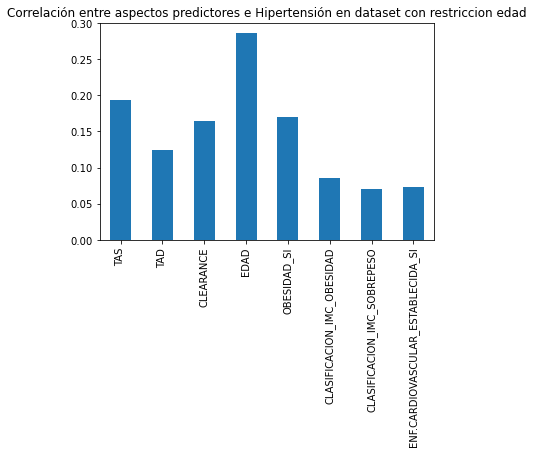

In [10]:
correlacion_target = abs(df.corr()['HIPERTENSION_SI'])
print(type(correlacion_target))
mask = (correlacion_target>0.05) & (correlacion_target<1)
correlacion_target = correlacion_target[mask]
correlacion_target.plot.bar()
plt.title("Correlación entre aspectos predictores e Hipertensión en dataset con restriccion edad",loc='center')

<div class="alert alert- block alert-warning">
    <b>Eliminacion de outliers<b/b>
        </div>

Se efectua la eliminación de outliers mediante la determinación de rangos de valores que serán aceptados en variables predictoras numéricas no dummies excepto EDAD

In [11]:
def rango_extremos(frame, label, quant_list):
        for i,v in enumerate(quant_list):
            if v > 0 and v < 100:
                quant_list[i] = v/100
        
        rango_outlier = frame[label].quantile(quant_list)
        #print ('range_outlier: type: {}, len: {}'.format(type(rango_outlier),len(rango_outlier)))
        return round(rango_outlier,2)

In [12]:
#Filtro valores_extremos en df segun percentiles
for v in ['COLESTEROL_TOTAL','CLEARANCE','UTMO_IMC','TAS','TAD']:
    rango_outlier = rango_extremos(df, v, [0.8, 99.8])
    rango_outlier = list(rango_outlier)
    mascara_outlier = (df[v]>= rango_outlier[0]) & (df[v] <= rango_outlier[1])
    df = df.drop(df[mascara_outlier == False].index)
print(df.shape[0])

8045


In [13]:
# dataset df sin outliers
#df.describe()

In [14]:
#sns.pairplot(df[['CLEARANCE','COLESTEROL_TOTAL','UTMO_IMC','TAS', 'TAD']])

In [15]:
# como quedaron las clases a predecir en df
print('Número de registros para el dataset para análisis de riesgo de hipertensión:')
print(df.shape)
print('Distribución en porcentaje en hipertensos y no hipertensos')
df.HIPERTENSION_SI.value_counts(normalize=True)

Número de registros para el dataset para análisis de riesgo de hipertensión:
(8045, 16)
Distribución en porcentaje en hipertensos y no hipertensos


0    0.514232
1    0.485768
Name: HIPERTENSION_SI, dtype: float64

<font color='magenta'>*Las clases quedaron balanceadas. Acá termina proceso de limpieza general del dataset*</font>

[Volver al índice](#Volver_indice)
<a href='#Volver_indice'></a> 

<a id='section3'></a>
### Sección 3


Se define una función para armar un dataframe y unir las métricas que se obtienen con los distintos modelos construidos para predecir

In [41]:
def metricas_modelos(name, y_test, y_pred, y_pred_proba):    
    metricas.loc[name,'accuracy'] = round(accuracy_score(y_test, y_pred), 3)
    metricas.loc[name,'recall'] = round(recall_score(y_test, y_pred), 3)
    metricas.loc[name,'precision'] = round(precision_score(y_test, y_pred), 3)
    metricas.loc[name,'f1_score'] = round(f1_score(y_test, y_pred), 3)
    fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])
    metricas.loc[name,'AUC'] = round(auc(fpr_log, tpr_log), 3)
    return metricas

***Random Forest y Análisis de features***

<div class="alert alert- block alert-success">
    <b>Random Forest - GridSearchCV - Metricas - Feature Importance<b>
        </div.

In [17]:
X = df.drop('HIPERTENSION_SI', axis = 1)
y = df.HIPERTENSION_SI
X.shape

(8045, 15)

In [18]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc= scaler.transform(X_test)

In [23]:
RFC = RandomForestClassifier()

params = {"n_estimators": [50, 100, 150], "max_depth": [6, 8, 10, 15],"random_state": [0]}
RFC = GridSearchCV(RFC, param_grid = params)
RFC.fit(X_train_sc, y_train)


print('Mejor Combinación de Hiperparámetros en Random Forest: ')
print(RFC.best_params_)

y_pred = RFC.predict(X_test_sc)
y_pred_proba = RFC.predict_proba(X_test_sc)

Mejor Combinación de Hiperparámetros en Random Forest: 
{'max_depth': 8, 'n_estimators': 50, 'random_state': 0}


In [20]:
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
#plt.ylabel('Etiquetas reales')
#plt.xlabel('Etiquetas predichas');

In [42]:
metricas = pd.DataFrame()
metricas_modelos('RFC', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808


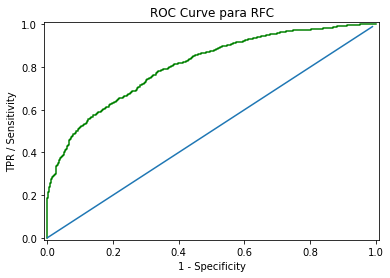

In [43]:
#curva roc
fpr_log, tpr_log, thr_log = roc_curve(y_test, y_pred_proba[:,1])

df_1 = pd.DataFrame(dict(fpr = fpr_log, tpr = tpr_log, thr = thr_log))

plt.axis([-0.01, 1.01, -0.01, 1.01])
plt.xlabel('1 - Specificity'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve para RFC')
plt.plot(df_1['fpr'], df_1['tpr'],'g')
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

<font color='magenta'>*Se quiere evaluar con los resultados de GridSearchCV y RandomForest, la importancia de los aspectos considerados hasta ahora para la prediccion. Para eso, se emplea el mejor modelo que se obtuvo con RFC y primero verificamos resultados del GridSearchCV de RFC.*</font>

In [44]:
RFC.best_estimator_.fit(X_train_sc, y_train)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=0)

In [45]:
y_pred = RFC.best_estimator_.predict(X_test_sc)
y_pred_proba = RFC.best_estimator_.predict_proba(X_test_sc)

In [46]:
# es una comprobacion de los resultados del modelo de RandomForest con GS
metricas_modelos('RFC_best', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808


In [47]:
importancias = RFC.best_estimator_.feature_importances_
print(importancias)

[0.15557105 0.08064449 0.07785479 0.10053242 0.0693527  0.17664549
 0.01185765 0.05525443 0.08572317 0.07185923 0.08575297 0.00314371
 0.00898799 0.00805008 0.00876985]


In [48]:
a = pd.Series(importancias,index = X.columns)
columns = a[importancias > 0.06].index

<AxesSubplot:title={'center':'Importancia de features: RandomForest con GridSearchCV'}>

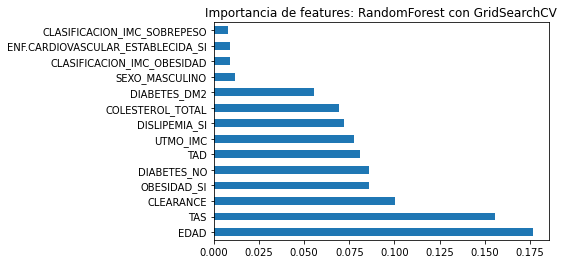

In [49]:
(pd.Series(importancias, index = X.columns).nlargest(14).plot(kind = 'barh', title = 'Importancia de features: RandomForest con GridSearchCV'))

<font color='magenta'>*De acuerdo con los resultados de feature_importances y considerando relevancia de mas de 6%, los aspectos centrales de la prediccion son NUEVE (9): EDAD, OBESIDAD_SI, CLEARANCE, UTMO_IMC, COLESTEROL_TOTAL, TAS, TAD, DISLIPEMIA_SI, DIABETES_NO*</font>

In [ ]:
#confusion_matrix(y_test, y_pred)

In [ ]:
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
#plt.ylabel('Etiquetas reales')
#plt.xlabel('Etiquetas predichas');

<font color='magenta'>*Se efectua una prueba del modelo Random Forest reduciendo las features (segun feature_importances) para ver como resultan las metricas en este caso*</font>

In [50]:
df_new = df[columns]
df_new['HIPERTENSION_SI'] = df['HIPERTENSION_SI']
df_new.shape

(8045, 10)

In [51]:
###definicion de dataset segun feature importance
Xn = df_new.drop('HIPERTENSION_SI',axis = 1)
yn = df_new.HIPERTENSION_SI

In [52]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size = 0.30, random_state = 1, stratify = y)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc= scaler.transform(X_test)

In [53]:
RFC_red = RandomForestClassifier()
params = {"n_estimators": [50, 100, 150, 200], "max_depth": [6, 8, 10, 15, 20], "random_state": [0]}

RFC_red = GridSearchCV(RFC_red, param_grid=params)

RFC_red.fit(X_train_sc, y_train)

y_pred= RFC_red.predict(X_test_sc)
y_pred_proba= RFC_red.predict_proba(X_test_sc)

print('Mejor Combinación de Hiperparámetros en Random Forest reducido con GridSearch: ')
print(RFC_red.best_params_)

Mejor Combinación de Hiperparámetros en Random Forest reducido con GridSearch: 
{'max_depth': 10, 'n_estimators': 200, 'random_state': 0}


In [ ]:
#confusion_matrix(y_pred, y_test)

In [ ]:
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
#plt.ylabel('Etiquetas reales')
#plt.xlabel('Etiquetas predichas');

In [54]:
metricas_modelos('RFC_red', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777


<font color='magenta'>*Los valores de accuracy empeoraron al considerar menos aspectos. La unica diferencia a resaltar es que se consigue un peor resultado que el anterior ahora con 200 estimadores y una profundidad igual a 10.*</font>

<div class="alert alert- block alert-success">
    <b>Análisis de feature importance por medio de SelectKbest<b/b>
        </div>

In [55]:
X=df.drop('HIPERTENSION_SI', axis = 1)
y=df.HIPERTENSION_SI

In [56]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 0, stratify = y)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [57]:
bestfeatures_k = SelectKBest(score_func=chi2, k=7)
fit_k = bestfeatures_k.fit_transform(X,y)

df_reduced_k = pd.DataFrame(fit_k, columns = X.columns[bestfeatures_k.get_support()])

In [58]:
df_scores = pd.DataFrame(bestfeatures_k.scores_)
df_columns = pd.DataFrame(X.columns)

scores = pd.concat([df_columns,df_scores],axis=1)
scores.columns = ['Feature' , 'Score']

print(scores.nlargest(10,'Score'))

                              Feature        Score
0                                 TAS  1876.802563
3                           CLEARANCE  1381.896484
5                                EDAD  1373.231587
1                                 TAD   548.551023
10                        OBESIDAD_SI    77.258909
14  ENF.CARDIOVASCULAR_ESTABLECIDA_SI    42.704890
13        CLASIFICACION_IMC_SOBREPESO    33.597836
12         CLASIFICACION_IMC_OBESIDAD    14.444259
2                            UTMO_IMC    11.025395
11           CLASIFICACION_IMC_NORMAL     8.877402


<div class="alert alert- block alert-success">
    <b>Análisis de feature importance por medio de RFECV<b/b>
        </div>

In [59]:
# Nuevo Intento con seleccion de features
skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

rfecv = RFECV(RandomForestClassifier(class_weight = 'balanced_subsample'), step = 1, cv=skf, scoring = 'accuracy')
           
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
      estimator=RandomForestClassifier(class_weight='balanced_subsample'),
      scoring='accuracy')

In [60]:
rfe_cv_score = rfecv.grid_scores_
n_features = np.arange(1,15)
n_features = np.insert(n_features, 0, 1)

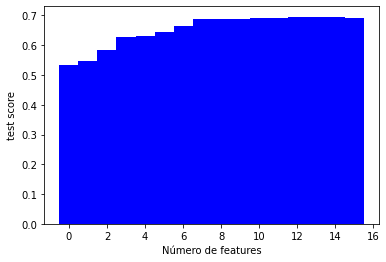

In [61]:
plt.bar(n_features,rfe_cv_score, color = "b", width = 3, align = "center")
plt.xlabel('Número de features');
plt.ylabel('test score');

In [62]:
rfe = RFE(RandomForestClassifier(class_weight='balanced_subsample'),\
       n_features_to_select = 7, step = 1)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(class_weight='balanced_subsample'),
    n_features_to_select=7)

In [63]:
X_train = pd.DataFrame(X_train, columns = X.columns.to_list())
X_test = pd.DataFrame(X_test, columns = X.columns.to_list())

print('Features Conservadas por RFECV:')
print(X_train.columns[rfe.support_])

print('\nFeatures Descartadas por RFECV')
print(X_train.columns[~rfe.support_])

X_train = X_train.loc[:, rfe.support_]
X_test = X_test.loc[:, rfe.support_]

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

Features Conservadas por RFECV:
Index(['TAS', 'TAD', 'UTMO_IMC', 'CLEARANCE', 'COLESTEROL_TOTAL', 'EDAD',
       'DIABETES_NO'],
      dtype='object')

Features Descartadas por RFECV
Index(['SEXO_MASCULINO', 'DIABETES_DM2', 'DISLIPEMIA_SI', 'OBESIDAD_SI',
       'CLASIFICACION_IMC_NORMAL', 'CLASIFICACION_IMC_OBESIDAD',
       'CLASIFICACION_IMC_SOBREPESO', 'ENF.CARDIOVASCULAR_ESTABLECIDA_SI'],
      dtype='object')


In [64]:
RFECV = RandomForestClassifier()

params = {"n_estimators": [40, 50, 100, 150, 200], 'max_depth': [6, 8, 10, 15, 20, 25], 'random_state':[0]}

RFECV = GridSearchCV(RFECV, param_grid = params)

RFECV.fit(X_train_sc, y_train)

y_pred = RFECV.predict(X_test_sc)
y_pred_proba = RFECV.predict_proba(X_test_sc)

print('Mejor Combinación de Hiperparámetros en Random Forest RFECV con GridSearch: ')
print(RFECV.best_params_)

Mejor Combinación de Hiperparámetros en Random Forest RFECV con GridSearch: 
{'max_depth': 6, 'n_estimators': 200, 'random_state': 0}


In [ ]:
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
#plt.ylabel('Etiquetas reales')
#plt.xlabel('Etiquetas predichas');

In [65]:
metricas_modelos('RFECV', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777
RFECV,0.686,0.668,0.680,0.674,0.752


[Volver al índice](#Volver_indice)
<a href='#Volver_indice'></a> 

<a id='section4'></a>
### Sección 4


***AdaBoost, GradientBoosting, XGBoost y LGBM con GridsearchCV***

Se parte del dataset df definido en la Sección 2

In [66]:
X = df.drop('HIPERTENSION_SI', axis = 1)
y = df.HIPERTENSION_SI

In [67]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify = y)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc= scaler.transform(X_test)

In [68]:
dt = DecisionTreeClassifier(random_state = 0)

***AdaBoosting + GridSearchCV***

In [69]:
params_AB = {"n_estimators": [50, 100, 200, 300], "learning_rate": [0.01, 0.1, 0.05], "base_estimator__max_depth": [1, 2, 3, 4]}

ABoost = GridSearchCV(AdaBoostClassifier(base_estimator = dt, random_state = 1), 
                       param_grid = params_AB, cv = skf,#verbose=1 
                        n_jobs = 3)
ABoost.fit(X_train_sc, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                                          random_state=1),
             n_jobs=3,
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4],
                         'learning_rate': [0.01, 0.1, 0.05],
                         'n_estimators': [50, 100, 200, 300]})

In [70]:
ABoost.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=0),
                   learning_rate=0.1, random_state=1)

In [71]:
y_pred = ABoost.best_estimator_.predict(X_test_sc)
y_pred_proba = ABoost.best_estimator_.predict_proba(X_test_sc)

In [72]:
metricas_modelos('ABoost', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777
RFECV,0.686,0.668,0.680,0.674,0.752
ABoost,0.717,0.693,0.715,0.704,0.790


***Gradient Boosting + GridSearchCV***

In [73]:
params_GB = {'n_estimators': [50, 100, 200, 300],'learning_rate': [0.001, 0.01, 0.1], 'max_depth' : [1, 2, 3, 4]}

GBoost = GridSearchCV(GradientBoostingClassifier(), param_grid = params_GB, cv = skf,# verbose=1,
                       n_jobs = 3)
GBoost.fit(X_train_sc, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 200, 300]})

In [75]:
GBoost.best_estimator_

GradientBoostingClassifier(max_depth=2, n_estimators=300)

In [74]:
y_pred = GBoost.best_estimator_.predict(X_test_sc)
y_pred_proba = GBoost.best_estimator_.predict_proba(X_test_sc)

In [76]:
metricas_modelos('GBoost', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777
RFECV,0.686,0.668,0.680,0.674,0.752
ABoost,0.717,0.693,0.715,0.704,0.790
GBoost,0.714,0.667,0.723,0.694,0.793


***ExtremeGradientBoosting + GridSearchCV***

In [77]:
params_XGB = {'n_estimators': [50, 100, 200, 300] , 'learning_rate': [0.001, 0.01, 0.1, 0.05], 'max_depth' : [1, 2, 3, 4]}

XGBoost = GridSearchCV(XGBClassifier(), param_grid = params_XGB, cv=skf,# verbose=1,
                        n_jobs = 3)
XGBoost.fit(X_train_sc, y_train)

[20:39:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None

In [78]:
XGBoost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
y_pred = XGBoost.best_estimator_.predict(X_test_sc)
y_pred_proba = XGBoost.best_estimator_.predict_proba(X_test_sc)

In [80]:
metricas_modelos('XGBoost', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777
RFECV,0.686,0.668,0.680,0.674,0.752
ABoost,0.717,0.693,0.715,0.704,0.790
GBoost,0.714,0.667,0.723,0.694,0.793
XGBoost,0.715,0.662,0.727,0.693,0.801


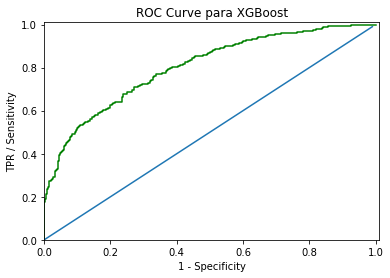

In [81]:
# la borro?
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

df_1 = pd.DataFrame(dict(fpr = fpr_log, tpr = tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificity'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve para XGBoost')
plt.plot(df_1['fpr'], df_1['tpr'],'g')
plt.plot(np.arange(0, 1, step =0.01), np.arange(0, 1, step = 0.01))
plt.show()

***LightGBM + GridSearchCV***

In [82]:
params_LGBM = {"n_estimators": [50, 100, 200, 300], "max_depth": [1, 2, 3, 4], "learning_rate": [0.01, 0.1]}
LGBM = GridSearchCV(LGBMClassifier(), param_grid = params_LGBM, cv = skf,# verbose=1,
                        n_jobs = 3)
LGBM.fit(X_train_sc, y_train)
y_pred=LGBM.best_estimator_.predict(X_test_sc)
y_pred_proba=LGBM.best_estimator_.predict_proba(X_test_sc)

In [83]:
LGBM.best_estimator_

LGBMClassifier(max_depth=4, n_estimators=50)

In [84]:
metricas_modelos('LGBM', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777
RFECV,0.686,0.668,0.680,0.674,0.752
ABoost,0.717,0.693,0.715,0.704,0.790
GBoost,0.714,0.667,0.723,0.694,0.793
XGBoost,0.715,0.662,0.727,0.693,0.801
LGBM,0.716,0.669,0.725,0.696,0.802


[Volver al índice](#Volver_indice)
<a href='#Volver_indice'></a> 

<a id='section5'></a>
### Sección 5


***Pipelines***

<div class="alert alert- block alert-success">
    <b>Resultados de los algunos modelos con Pipelines<b/b>
        </div>

In [85]:
X = df.drop('HIPERTENSION_SI', axis = 1)
y = df.HIPERTENSION_SI

In [86]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify = y)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc= scaler.transform(X_test)

***Pipe_0 con RandomForest (básico)***

In [87]:
pasos = [('scaler', StandardScaler()),('RFC', RandomForestClassifier())]
pipe_0 = Pipeline(pasos)
pipe_0.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RFC', RandomForestClassifier())])

In [88]:
y_pred = pipe_0.predict(X_test)
y_pred_proba = pipe_0.predict_proba(X_test)

In [89]:
metricas_modelos('pipe_0', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777
RFECV,0.686,0.668,0.680,0.674,0.752
ABoost,0.717,0.693,0.715,0.704,0.790
GBoost,0.714,0.667,0.723,0.694,0.793
XGBoost,0.715,0.662,0.727,0.693,0.801
LGBM,0.716,0.669,0.725,0.696,0.802
pipe_0,0.699,0.637,0.713,0.673,0.798


***Pipe con RandomForest con GridSearchCV***

In [90]:
pipe = Pipeline(pasos)
params_pipe = {'RFC__n_estimators': [50, 100, 200, 300],'RFC__max_depth': [6, 8, 10, 15]}
grid_1 = GridSearchCV(pipe, params_pipe, cv = skf)
grid_1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RFC', RandomForestClassifier())]),
             param_grid={'RFC__max_depth': [6, 8, 10, 15],
                         'RFC__n_estimators': [50, 100, 200, 300]})

In [91]:
grid_1.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('RFC',
                 RandomForestClassifier(max_depth=10, n_estimators=300))])

In [92]:
y_pred =grid_1.best_estimator_.predict(X_test)
y_pred_proba = grid_1.best_estimator_.predict_proba(X_test)
metricas_modelos('pipe_RFC', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777
RFECV,0.686,0.668,0.680,0.674,0.752
ABoost,0.717,0.693,0.715,0.704,0.790
GBoost,0.714,0.667,0.723,0.694,0.793
XGBoost,0.715,0.662,0.727,0.693,0.801
LGBM,0.716,0.669,0.725,0.696,0.802
pipe_0,0.699,0.637,0.713,0.673,0.798
pipe_RFC,0.717,0.666,0.728,0.695,0.808


***Pipe con dos opciones de escaladores, RandomForest con GridSearchCV***

In [93]:
pasos = [('scaler', StandardScaler()), ('RFC', RandomForestClassifier())]
new_params_pipe = [{'scaler': [StandardScaler(), MinMaxScaler()],'RFC__n_estimators': [50, 100, 150, 200], 'RFC__max_depth': [6,8,10,15]}]
grid_2 = GridSearchCV(pipe, new_params_pipe, cv = skf)
grid_2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RFC', RandomForestClassifier())]),
             param_grid=[{'RFC__max_depth': [6, 8, 10, 15],
                          'RFC__n_estimators': [50, 100, 150, 200],
                          'scaler': [StandardScaler(), MinMaxScaler()]}])

In [94]:
grid_2.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('RFC', RandomForestClassifier(max_depth=8))])

In [95]:
y_pred = grid_2.best_estimator_.predict(X_test)
y_pred_proba = grid_2.best_estimator_.predict_proba(X_test)
metricas_modelos('pipe_RFC_sc_2', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777
RFECV,0.686,0.668,0.680,0.674,0.752
ABoost,0.717,0.693,0.715,0.704,0.790
GBoost,0.714,0.667,0.723,0.694,0.793
XGBoost,0.715,0.662,0.727,0.693,0.801
LGBM,0.716,0.669,0.725,0.696,0.802
pipe_0,0.699,0.637,0.713,0.673,0.798
pipe_RFC,0.717,0.666,0.728,0.695,0.808


***Pipe con selección de features (sin registros de presión arterial), escalado, RandomForest con GridSearchCV***

In [96]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    
    def __init__(self,selected_features):
        self.selected_features = selected_features
    
    def fit(self,X,y = None):
        return self
    
    def transform(self, X, y = None):
        return X[self.selected_features]

In [97]:
selection = FeatureSelection(selected_features=['CLEARANCE', 'EDAD', 'OBESIDAD_SI', 'COLESTEROL_TOTAL', 'DIABETES_NO', 'DIABETES_DM2'])
pasos = [('feature_engineering', selection),('scaler', MinMaxScaler()),('RFC', RandomForestClassifier())]
pipe = Pipeline(pasos)
param_grid = [{'scaler': [StandardScaler(), MinMaxScaler()], 'RFC__n_estimators': [50,100,150], 'RFC__max_depth': [6,8,10]}]
grid_3 = GridSearchCV(pipe, param_grid, cv = skf)

grid_3.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureSelection(selected_features=['CLEARANCE',
                                                                            'EDAD',
                                                                            'OBESIDAD_SI',
                                                                            'COLESTEROL_TOTAL',
                                                                            'DIABETES_NO',
                                                                            'DIABETES_DM2'])),
                                       ('scaler', MinMaxScaler()),
                                       ('RFC', RandomForestClassifier())]),
             param_grid=[{'RFC__max_depth': [6, 8, 10],
                          'RFC__n_estimators': [50, 100, 150],
                          'scaler': [StandardScaler(),

In [98]:
grid_3.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureSelection(selected_features=['CLEARANCE', 'EDAD',
                                                     'OBESIDAD_SI',
                                                     'COLESTEROL_TOTAL',
                                                     'DIABETES_NO',
                                                     'DIABETES_DM2'])),
                ('scaler', MinMaxScaler()),
                ('RFC', RandomForestClassifier(max_depth=6, n_estimators=150))])

In [99]:
y_pred = grid_3.best_estimator_.predict(X_test)
y_pred_proba = grid_3.best_estimator_.predict_proba(X_test)
metricas = metricas_modelos('pipe_RFC_select', y_test, y_pred, y_pred_proba)
display(metricas)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777
RFECV,0.686,0.668,0.680,0.674,0.752
ABoost,0.717,0.693,0.715,0.704,0.790
GBoost,0.714,0.667,0.723,0.694,0.793
XGBoost,0.715,0.662,0.727,0.693,0.801
LGBM,0.716,0.669,0.725,0.696,0.802
pipe_0,0.699,0.637,0.713,0.673,0.798
pipe_RFC,0.717,0.666,0.728,0.695,0.808


***Pipe y Regresión Logística con feature promedio de presión arterial***

In [100]:
df_pipe=data[['TAS','TAD','SEXO', 'DIABETES', 'DISLIPEMIA', 'OBESIDAD','UTMO_IMC', 'CLASIFICACION_IMC', 'CLEARANCE','COLESTEROL_TOTAL','EDAD','ENF.CARDIOVASCULAR_ESTABLECIDA','HIPERTENSION']]

# se eliminan registros con nans
df_pipe = df_pipe.dropna()
df_pipe_40 = df_pipe[df_pipe['EDAD'] >= 40]
df_pipe_40['nueva'] = (df_pipe_40['TAS'] + df_pipe_40['TAD'])/2
df_pipe_40 = df_pipe_40.drop(['TAS','TAD'], axis=1)

df_pipe_40 = pd.get_dummies(df_pipe_40, prefix =['SEXO', 'DIABETES', 'DISLIPEMIA', 'OBESIDAD','CLASIFICACION_IMC','ENF.CARDIOVASCULAR_ESTABLECIDA','HIPERTENSION'], columns=['SEXO', 'DIABETES', 'DISLIPEMIA', 'OBESIDAD','CLASIFICACION_IMC','ENF.CARDIOVASCULAR_ESTABLECIDA','HIPERTENSION'],drop_first = True)

X = df_pipe_40.drop('HIPERTENSION_SI',axis=1)
y = df_pipe_40['HIPERTENSION_SI']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,stratify = y, random_state = 0)
pipe_40 = make_pipeline(StandardScaler(), LogisticRegression())
pipe_40.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [101]:
y_pred = pipe_40.predict(X_test)
y_pred_proba = pipe_40.predict_proba(X_test)
metricas_modelos('pipe_RL', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777
RFECV,0.686,0.668,0.680,0.674,0.752
ABoost,0.717,0.693,0.715,0.704,0.790
GBoost,0.714,0.667,0.723,0.694,0.793
XGBoost,0.715,0.662,0.727,0.693,0.801
LGBM,0.716,0.669,0.725,0.696,0.802
pipe_0,0.699,0.637,0.713,0.673,0.798
pipe_RFC,0.717,0.666,0.728,0.695,0.808


***Pipe con Regresión Logística con feature promedio de presion arterial con Grid Search***

In [102]:
params_grid = {"logisticregression__C": [0.01, 0.1, 1, 10, 100]}
pipe_RL_CV = GridSearchCV(pipe_40, params_grid, cv = 10)
pipe_RL_CV.fit(X_train, y_train)
pipe_RL_CV.best_params_

{'logisticregression__C': 0.01}

In [103]:
y_pred = pipe_RL_CV.best_estimator_.predict(X_test)
y_pred_proba = pipe_RL_CV.best_estimator_.predict_proba(X_test)
metricas_modelos('pipe_RL_CV', y_test, y_pred, y_pred_proba)

,accuracy,recall,precision,f1_score,AUC
RFC,0.715,0.655,0.731,0.691,0.808
RFC_best,0.715,0.655,0.731,0.691,0.808
RFC_red,0.685,0.638,0.690,0.663,0.777
RFECV,0.686,0.668,0.680,0.674,0.752
ABoost,0.717,0.693,0.715,0.704,0.790
GBoost,0.714,0.667,0.723,0.694,0.793
XGBoost,0.715,0.662,0.727,0.693,0.801
LGBM,0.716,0.669,0.725,0.696,0.802
pipe_0,0.699,0.637,0.713,0.673,0.798
pipe_RFC,0.717,0.666,0.728,0.695,0.808


In [113]:
mejor_modelo_accuracy = metricas[metricas.accuracy == metricas.accuracy.max()].index
mejor_modelo_recall = metricas[metricas.recall == metricas.recall.max()].index
mejor_modelo_f1_score = metricas[metricas.f1_score == metricas.f1_score.max()].index
mejor_modelo_precision = metricas[metricas.precision == metricas.precision.max()].index
mejor_modelo_AUC = metricas[metricas.AUC == metricas.AUC.max()].index
print('Mejor modelo accuracy:', mejor_modelo_accuracy)
print('Mejor modelo recall:', mejor_modelo_recall)
print('Mejor modelo f1_score:', mejor_modelo_f1_score)
print('Mejor modelo precision:', mejor_modelo_precision)
print('Mejor modelo AUC:', mejor_modelo_AUC)

Mejor modelo accuracy: Index(['ABoost', 'pipe_RFC'], dtype='object')
Mejor modelo recall: Index(['ABoost'], dtype='object')
Mejor modelo f1_score: Index(['ABoost'], dtype='object')
Mejor modelo precision: Index(['RFC', 'RFC_best'], dtype='object')
Mejor modelo AUC: Index(['RFC', 'RFC_best', 'pipe_RFC'], dtype='object')


In [125]:
print('Mejor accuracy:')
print(metricas.accuracy.sort_values(ascending=False)[0:4])
print()
print('Mejor recall:')
print(metricas.recall.sort_values(ascending=False)[0:4])
print()
print('Mejor f1_score:')
print(metricas.f1_score.sort_values(ascending=False)[0:4])
print()
print('Mejor precision:')
print(metricas.precision.sort_values(ascending=False)[0:4])
print()
print('Mejor AUC:')
print(metricas.AUC.sort_values(ascending=False)[0:4])

Mejor accuracy:
pipe_RFC    0.717
ABoost      0.717
LGBM        0.716
XGBoost     0.715
Name: accuracy, dtype: float64

Mejor recall:
ABoost    0.693
LGBM      0.669
RFECV     0.668
GBoost    0.667
Name: recall, dtype: float64

Mejor f1_score:
ABoost      0.704
LGBM        0.696
pipe_RFC    0.695
GBoost      0.694
Name: f1_score, dtype: float64

Mejor precision:
RFC_best    0.731
RFC         0.731
pipe_RFC    0.728
XGBoost     0.727
Name: precision, dtype: float64

Mejor AUC:
pipe_RFC         0.808
RFC_best         0.808
RFC              0.808
pipe_RFC_sc_2    0.805
Name: AUC, dtype: float64


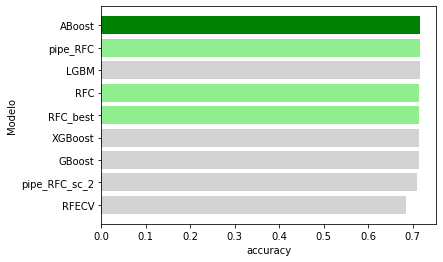

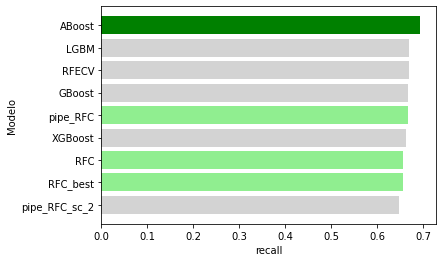

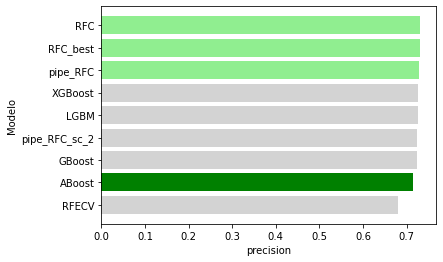

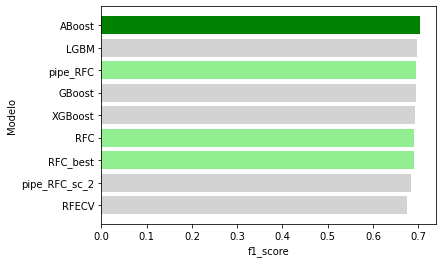

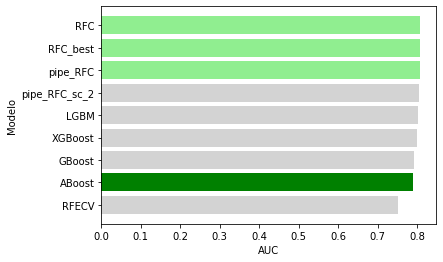

In [135]:
for i in metricas.columns:
    rdos= metricas[[i]]
    rdos['colors']='lightgray'
    rdos=rdos.loc[['pipe_RFC','ABoost','LGBM','XGBoost','RFECV','GBoost','RFC_best','RFC','pipe_RFC_sc_2']]
    rdos.loc[['RFC', 'RFC_best','pipe_RFC'],'colors']= 'lightgreen'
    rdos.loc[['ABoost'],'colors']= 'green'
    rdos=rdos.sort_values([i])
    plt.barh(width=rdos[i],y=rdos.index,color=rdos.colors)
    plt.ylabel('Modelo')
    plt.xlabel(i)
    t= i + '.jpg'
    plt.show()

[Volver al índice](#Volver_indice)
<a href='#Volver_indice'></a> 

<a id='section6'></a>
### Sección 6


***Deploy de modelos***

In [126]:
df.shape

(8045, 16)

In [127]:
X=df.drop('HIPERTENSION_SI',axis=1)
y=df.HIPERTENSION_SI

In [128]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,stratify=y, random_state=0)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc= scaler.transform(X_test)

In [129]:
with open('ABoost.pkl', 'wb') as f_ABoost:
    pickle.dump(ABoost, f_ABoost)

In [130]:
[x for x in os.listdir() if 'pkl' in x]

['ABoost.pkl', 'pipe.pkl', 'RFC.pkl']

In [132]:
with open('./ABoost.pkl', 'rb') as f_ABoost:
        modelo_ABoost = pickle.load(f_ABoost)

In [133]:
y_pred=modelo_ABoost.predict(X_test_sc)
type(y_pred)
resultados=pd.DataFrame(y_pred,columns=['predicción'])
resultados.value_counts()

predicción
0             639
1             568
dtype: int64

[Volver al índice](#Volver_indice)
<a href='#Volver_indice'></a> 

<a id='section7'></a>
### Sección 7


***Conclusiones***

1. Se trabajó con la franja etaria de 40 o más años para la predicción de riesgo de hipertensión. Se seleccionaron columnas predictoras en base a publicaciones del tema.
2. El dataset contaba originalmente con casi 60000 registros, al filtrar quedamos para trabajar con un dataset de alrededor de 8000 registros.
3. Se analizaron 3 modelos de ensamble com RandomForest con diferentes implementaciones (seleccion de variables predictoras).
4. Se analizaron 4 modelos de boosting con árboles de decisión cmo estimadores primarios.
5. Se armaron 6 implementaciones con pipelines de menor a moyor complejidad, incluyendo feature engineering, escalados de distinto tipo, con RandomForest y RegresionLogistica, y además GridSearchCV.
6. Los mejores modelos resultaron, segun las métricas consideradas:
* Mejor accuracy: AdaBoost (0.717 %)
* Mejor recall: AdaBoost (0.693 %)
* Mejor f1_score: AdaBoost (0.704 %)
* Mejor precisión: RFC (0.731 %)
* Mejor AUC: RFC (0.808 %)
7. Si se restringe la franja etaria, en otras corridas, se pudo ver que la exactitud (accuracy) de las predicciones de los modelos mejora mientras que el recall hace todo lo contrario.

[Volver al índice](#Volver_indice)
<a href='#Volver_indice'></a> 